In [13]:
# load data 

import pandas as pd
# df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
# df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.shape

(891, 12)

In [15]:
# drop unwanted columns
df_train_phase1 = df_train.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])
df_train_phase1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
# check for nul values
df_train_phase1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [5]:
df_train_phase1.shape

(891, 7)

In [6]:
# Age can be a critical fact so drop age=Nan rows
df_train_phase1.dropna(inplace=True)
df_train_phase1.shape

(714, 7)

In [7]:
df_train_phase1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
# One hot encoding
dummies = pd.get_dummies(df_train_phase1.Sex, dtype='i')
df_train_phase2 = pd.concat([df_train_phase1, dummies], axis='columns')
df_train_phase2.drop(['Sex', 'female'], axis='columns', inplace=True)
df_train_phase2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [125]:
df_train_phase3 = df_train_phase2

In [127]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train_phase3[['Age']])
df_train_phase3['Age'] = scaler.transform(df_train_phase3[['Age']])
scaler.fit(df_train_phase3[['Fare']])
df_train_phase3['Fare'] = scaler.transform(df_train_phase3[['Fare']])
df_train_phase3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,0.271174,1,0,0.014151,1
1,1,1,0.472229,1,0,0.139136,0
2,1,3,0.321438,0,0,0.015469,0
3,1,1,0.434531,1,0,0.103644,0
4,0,3,0.434531,0,0,0.015713,1


In [218]:
# PCA
from sklearn.decomposition import PCA 
pca = PCA(0.9)  # from all give me 90% of useful features
pca.fit(df_train_phase3)
pca.components_

array([[ 0.01900212,  0.10491091, -0.05960694,  0.76668028,  0.6210885 ,
         0.01565672, -0.10623054],
       [ 0.3146047 , -0.90957319,  0.06046456, -0.02961526,  0.14954711,
         0.06842091, -0.20523576],
       [ 0.09261007,  0.20704283, -0.00347751, -0.63607652,  0.71938728,
        -0.0054593 , -0.16249107],
       [-0.61949185, -0.31055878,  0.08913829, -0.05965771,  0.26627196,
         0.0165399 ,  0.66113848]])

### Model creation

In [158]:
# define features
x = df_train_phase3.drop(['Survived','SibSp','Parch'], axis='columns')
x.head()

,Pclass,Age,Fare,male
0,3,0.271174,0.014151,1
1,1,0.472229,0.139136,0
2,3,0.321438,0.015469,0
3,1,0.434531,0.103644,0
4,3,0.434531,0.015713,1


In [159]:
# define labels
y = df_train_phase3['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [160]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [161]:
# Use Logistic regression

In [162]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train,y_train)
logistic_regression_model.score(x_test,y_test)

0.8321678321678322

In [163]:
# Decision tree

In [174]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)
decision_tree_model.score(x_test, y_test)

0.7622377622377622

In [165]:
# Support Vector machine

In [166]:
from sklearn.svm import SVC
svm_model = SVC(C=100)
svm_model.fit(x_train, y_train)
svm_model.score(x_test,y_test)

0.8391608391608392

In [167]:
# Random forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=50)
random_forest_model.fit(x_train,y_train)
random_forest_model.score(x_test,y_test)

0.7972027972027972

In [171]:
# Naive bayes classification

In [172]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)
naive_model.score(x_test,y_test)

0.8251748251748252

In [201]:
# KNN classification

In [203]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.8111888111888111

In [ ]:
# Bagging

In [219]:
y_train.value_counts()

Survived
0    331
1    240
Name: count, dtype: int64

In [225]:
# 100 bags
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    estimator=SVC(C=100),
    n_estimators=100, 
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train,y_train)
print(f' bag_model.oob_score_ : {bag_model.oob_score_}')
bag_model.score(x_test,y_test)

 bag_model.oob_score_ : 0.7880910683012259


0.8461538461538461

In [1]:
# NN Network
import tensorflow as tf

In [226]:
# K Fold cross validation

In [227]:
from sklearn.model_selection import cross_val_score
print(f'logistic regression : {np.mean(cross_val_score(LogisticRegression(), x, y, cv=5))}')
print(f'decission tree : {np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=5))}')
print(f'support vector machine : {np.mean(cross_val_score(SVC(C=100), x, y, cv=5))}')
print(f'random forest : {np.mean(cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv=5))}')
print(f'naive bayes : {np.mean(cross_val_score( GaussianNB(), x, y, cv=5))}')
print(f'KNN classifier : {np.mean(cross_val_score( KNeighborsClassifier(n_neighbors=5), x, y, cv=5))}')
print(f'bag model : {np.mean(cross_val_score(bag_model, x, y, cv=5))}')

logistic regression : 0.7857480547621394
decission tree : 0.7717817393873732
support vector machine : 0.7983551659607998
random forest : 0.7983847138776715
naive bayes : 0.7661577858760958
KNN classifier : 0.7997537673594011
bag model : 0.8025805180734757


In [205]:
model_params = {
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20,50,100,200],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,5,10]
        }
    }
}

In [206]:
scores = []

for model, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model':model,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    }) 

In [207]:
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.798596,"{'C': 200, 'kernel': 'rbf'}"
1,random_forest,0.821312,{'n_estimators': 10}
2,logistic_regression,0.786270,{'C': 5}
3,KNN,0.810801,{'n_neighbors': 5}


In [208]:
model = KNeighborsClassifier(n_neighbors=5)

In [209]:
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8391608391608392

In [210]:
# confusion metric
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[81, 12],
       [11, 39]])

Text(33.22222222222222, 0.5, 'Truth')

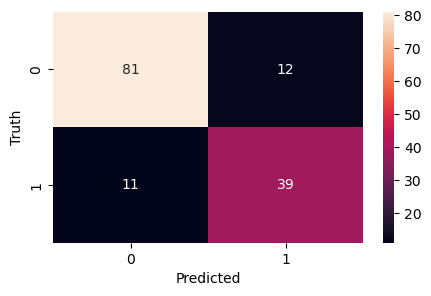

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        93
           1       0.76      0.78      0.77        50

    accuracy                           0.84       143
   macro avg       0.82      0.83      0.82       143
weighted avg       0.84      0.84      0.84       143



### Generate test dataset

In [27]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
df_test_phase1 = df_test.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])
df_test_phase1.dropna(inplace=True)

In [19]:
dummies = pd.get_dummies(df_test_phase1.Sex, dtype='i')
df_test_phase2 = pd.concat([df_test_phase1, dummies], axis='columns')
df_test_phase2.drop(['Sex', 'female'], axis='columns', inplace=True)
df_test_phase2.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [55]:
predicted = model.predict(df_test_phase2)

In [58]:
df_pred = pd.DataFrame()
df_pred['Survived'] = pd.DataFrame(predicted)

In [59]:
df_pred.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [62]:
last = pd.concat([df_test['PassengerId'],df_pred], axis='columns')
last.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [63]:
last.to_csv('./data/predicted.csv', index=False)